In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [2]:
import pandas as pd
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
import matplotlib.pyplot as plt
plt.scatter(df["sepal length (cm)"],df["sepal width (cm)"])
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
x=df.drop(["sepal length (cm)","sepal width (cm)"],axis=1)
x.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


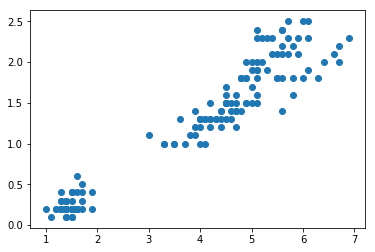

In [5]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])

In [6]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
yp=km.fit_predict(x)

In [8]:
x["cluster"]=yp
x.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


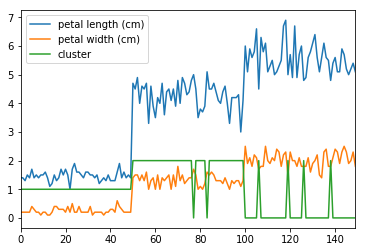

In [9]:
x.plot()

In [10]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [11]:
df1=x[x.cluster==0]
df2=x[x.cluster==1]
df3=x[x.cluster==0]

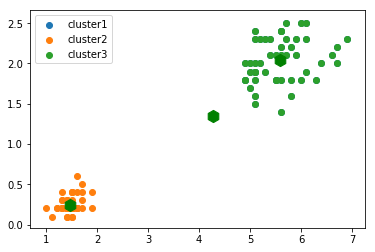

In [12]:
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],label="cluster1")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],label="cluster2")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],label="cluster3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=150,color='green',marker='h')
plt.legend()

In [13]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(x[["petal length (cm)","petal width (cm)"]])
    sse.append(km.inertia_)
sse    

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.477123363965468,
 13.98321314102564,
 11.059463574394924,
 9.243738252086079,
 7.615402244955953,
 6.456494541406307]

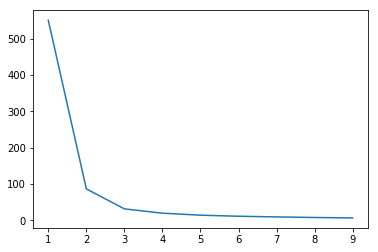

In [14]:
import matplotlib.pyplot as plt
plt.plot(k_rng,sse)